# **Importing Modules**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from skimage.color import rgb2gray 
from skimage.transform import resize 
from skimage import data,feature
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import imageio
from skimage import feature
import imageio.v2 as imageio
import cv2

# **Taking dataset**

In [7]:
datasetpath = 'dataset'

converting dataset to batchs by tensorflow pipeline

In [8]:
BATCH_SIZE = 30
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetpath,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


NotFoundError: Could not find directory dataset

# **conveting dataset to LBP**

In [9]:
from skimage import feature


def lbp_features(img):
    lbp = feature.local_binary_pattern(img.astype(np.uint8), 8, 1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

In [10]:

dataseth = []
datalabel = []
featureo =[]
for image_batch, labels_batch in dataset.take(150):
    for i in range(30):
#         img = image_batch[i].numpy().astype("uint8")
        img = image_batch[i].numpy().astype("float")
        grayim = rgb2gray(img) 
        gI1 = resize(grayim,(256,256))
        lbp = lbp_features(gI1)
        image = np.array(lbp).flatten()
        dataseth.append(image)
        featureo.append(lbp)
        datalabel.append(labels_batch[i])

# **Implementing KNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
x_train,x_test,y_train,y_test = train_test_split(dataseth,datalabel,test_size= 0.25)
knn.fit(x_train,y_train)

In [12]:
knn.score(x_test,y_test)

0.7293333333333333

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm =confusion_matrix(y_test,y_pred)
cm

array([[188,  11,  41],
       [ 43, 174,  25],
       [ 66,  17, 185]])

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')


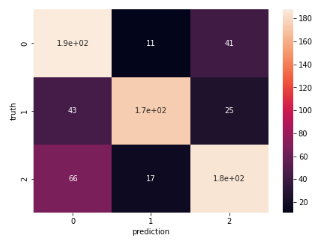

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.63      0.78      0.70       240
           1       0.86      0.72      0.78       242
           2       0.74      0.69      0.71       268

    accuracy                           0.73       750
   macro avg       0.74      0.73      0.73       750
weighted avg       0.74      0.73      0.73       750

In [18]:
acc = []
loss = []
for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=9)
    x_train,x_test,y_train,y_test = train_test_split(featureo,datalabel,test_size= 0.18)
    knn.fit(x_train,y_train)
    acc1 = knn.score(x_test,y_test)
    acc.append(acc1)
    i= i-1
    

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(range(20), acc, label='Training Accuracy')
# plt.plot(EPOCHS, acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')
plt.show()

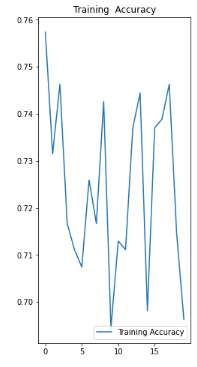